In [1]:
!git clone https://github.com/guyuchao/Vessel-wgan-pytorch.git

Cloning into 'Vessel-wgan-pytorch'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128
Receiving objects: 100% (128/128), 28.16 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
import cv2
import os
import h5py
import numpy as np
from PIL import Image

In [3]:
TRAIN_IMG = '/content/train/images'
TRAIN_LABEL = '/content/train/labels'

TEST_IMG = '/content/test/images'
TEST_LABEL = '/content/test/labels'

In [4]:
images_train = "/content/Vessel-wgan-pytorch/eyedata/train/img"
labels_train = "/content/Vessel-wgan-pytorch/eyedata/train/label"

Nimgs = 20
channels = 1
height = 584
width = 565

imgs = np.empty((Nimgs,height,width,channels))
lbls = np.empty((Nimgs,height,width))

i=0
for file in sorted(os.listdir(images_train)):
  img = cv2.imread(images_train+'/'+file, 0)
  img = np.expand_dims(img, axis=0)
  img = np.moveaxis(img,0, -1)
  #print(img.shape)
  imgs[i] = img
  i += 1

i=0
for file in sorted(os.listdir(labels_train)):
  g_truth = Image.open(labels_train +'/'+ file)
  lbls[i] = np.asarray(g_truth)
  i += 1

In [5]:
print(imgs.shape)
print(lbls.shape)

(20, 584, 565, 1)
(20, 584, 565)


In [6]:
for i in range(20):
  cv2.imwrite(TRAIN_IMG + '/' + str(i) + '.png', imgs[i])

for i in range(20):
  cv2.imwrite(TRAIN_LABEL + '/' + str(i) + '.png', lbls[i])

In [7]:
images_test = "/content/Vessel-wgan-pytorch/eyedata/val/img"
labels_test = "/content/Vessel-wgan-pytorch/eyedata/val/label"

Nimgs = 20
channels = 1
height = 584
width = 565

imgs = np.empty((Nimgs,height,width,channels))
lbls = np.empty((Nimgs,height,width))

i=0
for file in sorted(os.listdir(images_test)):
  img = cv2.imread(images_test+'/'+file, 0)
  img = np.expand_dims(img, axis=0)
  img = np.moveaxis(img,0, -1)
  #print(img.shape)
  imgs[i] = img
  i += 1

i=0
for file in sorted(os.listdir(labels_test)):
  g_truth = Image.open(labels_test +'/'+ file)
  lbls[i] = np.asarray(g_truth)
  i += 1

In [8]:
print(imgs.shape)
print(lbls.shape)

(20, 584, 565, 1)
(20, 584, 565)


In [9]:
j = 1
for i in range(20):
  cv2.imwrite(TEST_IMG + '/' + str(j) + '.png',imgs[i])
  j += 1

j = 1
for i in range(20):
  cv2.imwrite(TEST_LABEL + '/' + str(j) + '.png',lbls[i])
  j += 1

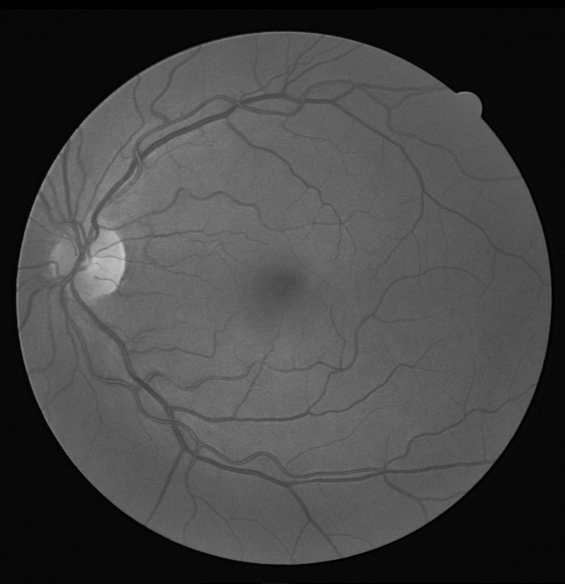

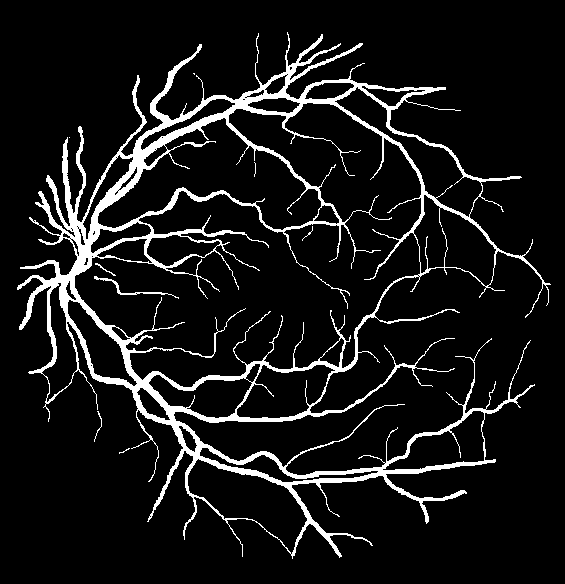

In [10]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs[0])
cv2_imshow(lbls[0])